In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.api.types import CategoricalDtype

Data understanding has the most crucial role to in solving the business problem.Let's get a data overview.

In [3]:
#Foolowing are the 6 different data files.
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
order_product_prior = pd.read_csv('order_products__prior.csv')
order_product_train = pd.read_csv('order_products__train.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


The data insights from the order history of the customers show that the total number of orders from each buyer range from 4-100. Customers with at atleast 4 orders are maximun in the numbers, nearly 24k.(Calculate how much percentage is this of total customers(almost 12%)). However, there are still customers who ordered almost 100 times from the store. 

In [10]:
departments.groupby('department_id')['department'].unique()

department_id
1              [frozen]
2               [other]
3              [bakery]
4             [produce]
5             [alcohol]
6       [international]
7           [beverages]
8                [pets]
9     [dry goods pasta]
10               [bulk]
11      [personal care]
12       [meat seafood]
13             [pantry]
14          [breakfast]
15       [canned goods]
16         [dairy eggs]
17          [household]
18             [babies]
19             [snacks]
20               [deli]
21            [missing]
Name: department, dtype: object

In [12]:
number_of_orders_by_users = orders.groupby('user_id')['order_number'].count().reset_index()
number_of_orders_by_users

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


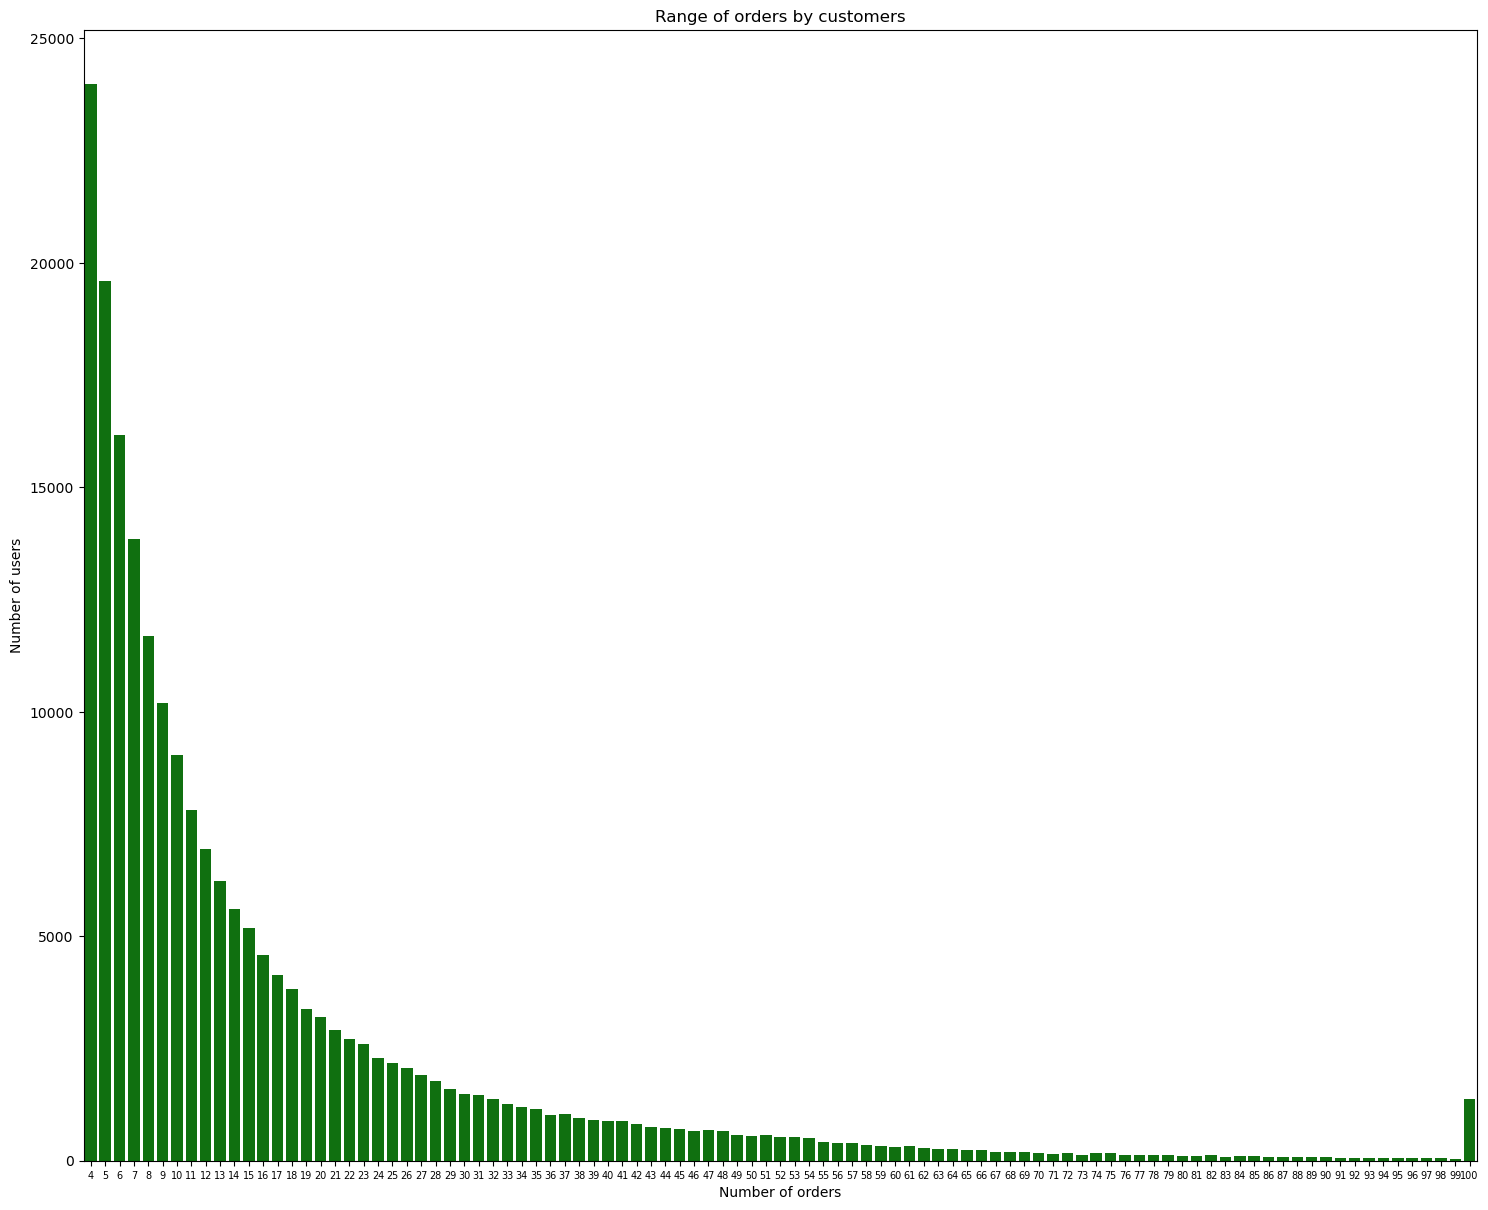

In [13]:
fig, ax= plt.subplots(figsize=(15,12))
ax = sns.countplot(x = 'order_number' , data = number_of_orders_by_users, color='green')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Number of orders')
ax.set_ylabel('Number of users')
ax.set_title('Range of orders by customers')
plt.savefig("Order range by customer")
plt.show()

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


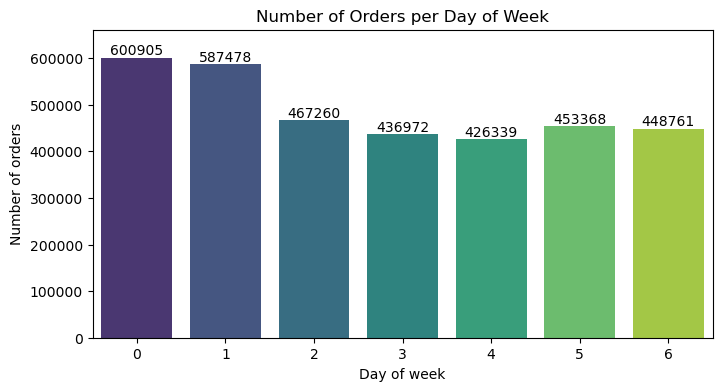

In [19]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(orders['order_dow'], palette='viridis')
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of orders')
ax.set_title('Number of Orders per Day of Week')
plt.savefig("Number of Orders per Day of Week")
ax.bar_label(ax.containers[-1])
ax.margins(y=0.1)
plt.show()

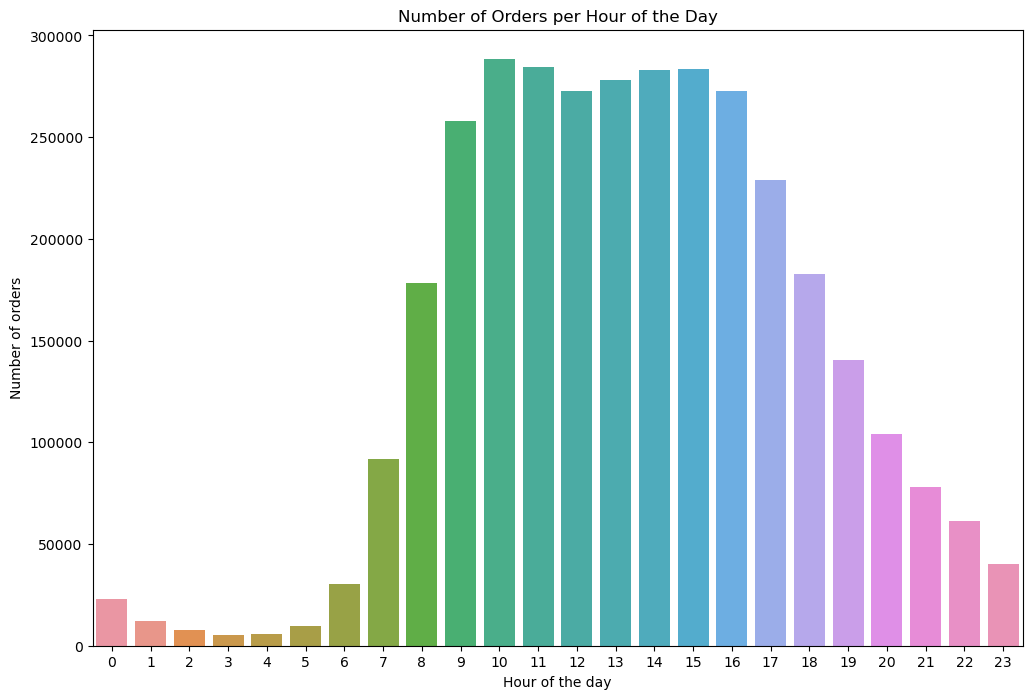

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax= sns.countplot(x=orders['order_hour_of_day'])
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Number of orders')
ax.set_title('Number of Orders per Hour of the Day')
plt.savefig("Number of Orders per Hour of the Day")
plt.show()

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


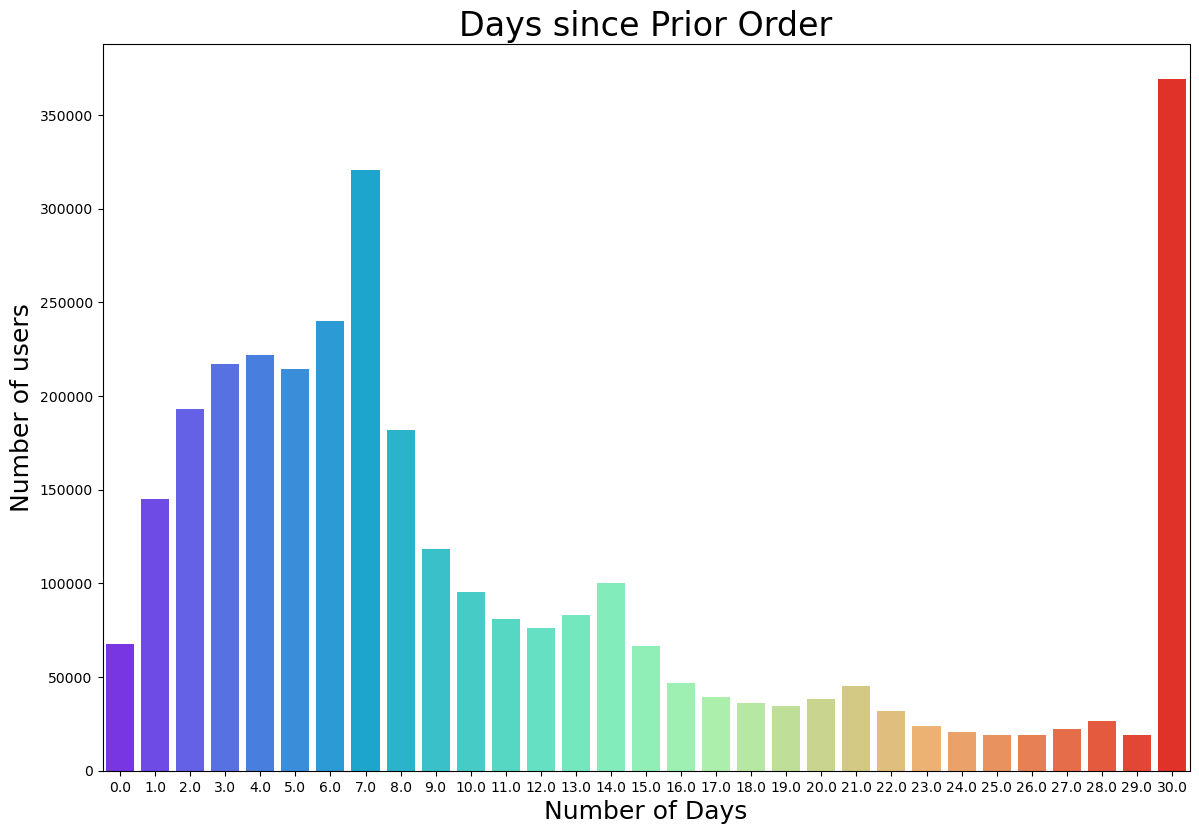

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(orders['days_since_prior_order'], palette='rainbow')
plt.tight_layout()
ax.set_xlabel('Number of Days', size=18)
ax.set_ylabel('Number of users', size=18)
ax.set_title('Days since Prior Order', size=24)
plt.savefig("Difference of Days within Orders")
plt.show()

In [24]:
unique_users_by_week = orders.groupby('order_dow')['user_id'].nunique()

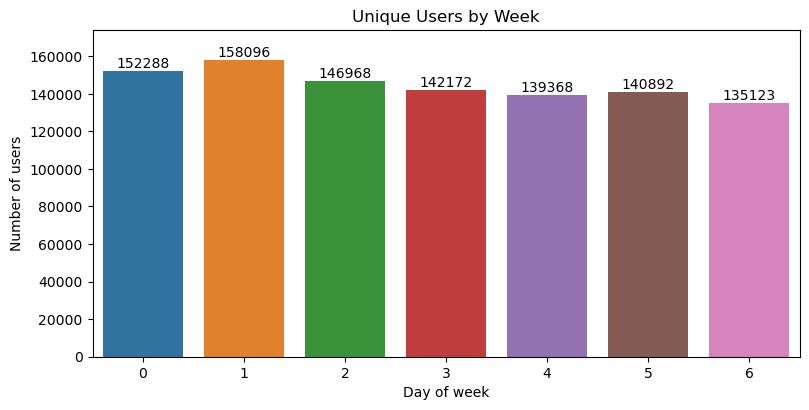

In [25]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x =unique_users_by_week.index, y=unique_users_by_week.values )
plt.tight_layout()
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of users')
ax.set_title('Unique Users by Week')
ax.bar_label(ax.containers[-1])
ax.margins(y=0.1)
plt.show()

In [30]:
users_by_dow = orders.groupby('order_dow')['user_id'].count().reset_index()
users_by_dow

,order_dow,user_id
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


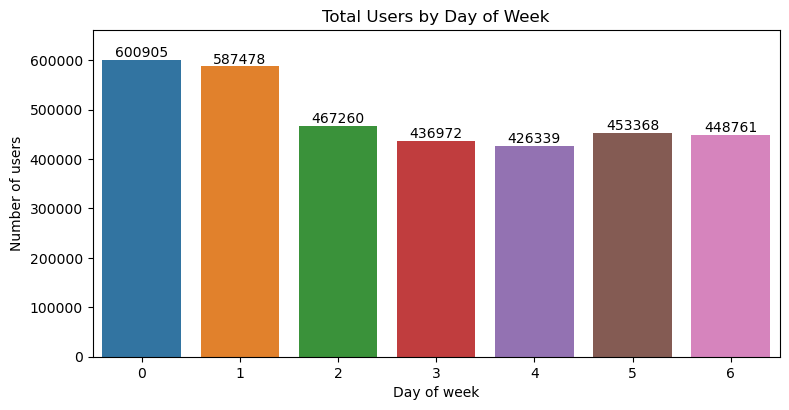

In [33]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x =users_by_dow['order_dow'], y=users_by_dow['user_id'] )
plt.tight_layout()
ax.set_xlabel('Day of week')
ax.set_ylabel('Number of users')
ax.set_title('Total Users by Day of Week')
ax.bar_label(ax.containers[-1])
ax.margins(y=0.1)
plt.show()

In [34]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [35]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [36]:
departments['department'].nunique()

21

In [37]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [38]:
products = products.merge(departments, how='inner', on='department_id')
products = products.merge(aisles, how='inner', on='aisle_id')
products.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [39]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [40]:
products.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [41]:
products_in_departmarts = products.groupby('department')['product_id'].nunique()
products_in_departmarts

department
alcohol            1054
babies             1081
bakery             1516
beverages          4365
breakfast          1115
bulk                 38
canned goods       2092
dairy eggs         3449
deli               1322
dry goods pasta    1858
frozen             4007
household          3085
international      1139
meat seafood        907
missing            1258
other               548
pantry             5371
personal care      6563
pets                972
produce            1684
snacks             6264
Name: product_id, dtype: int64

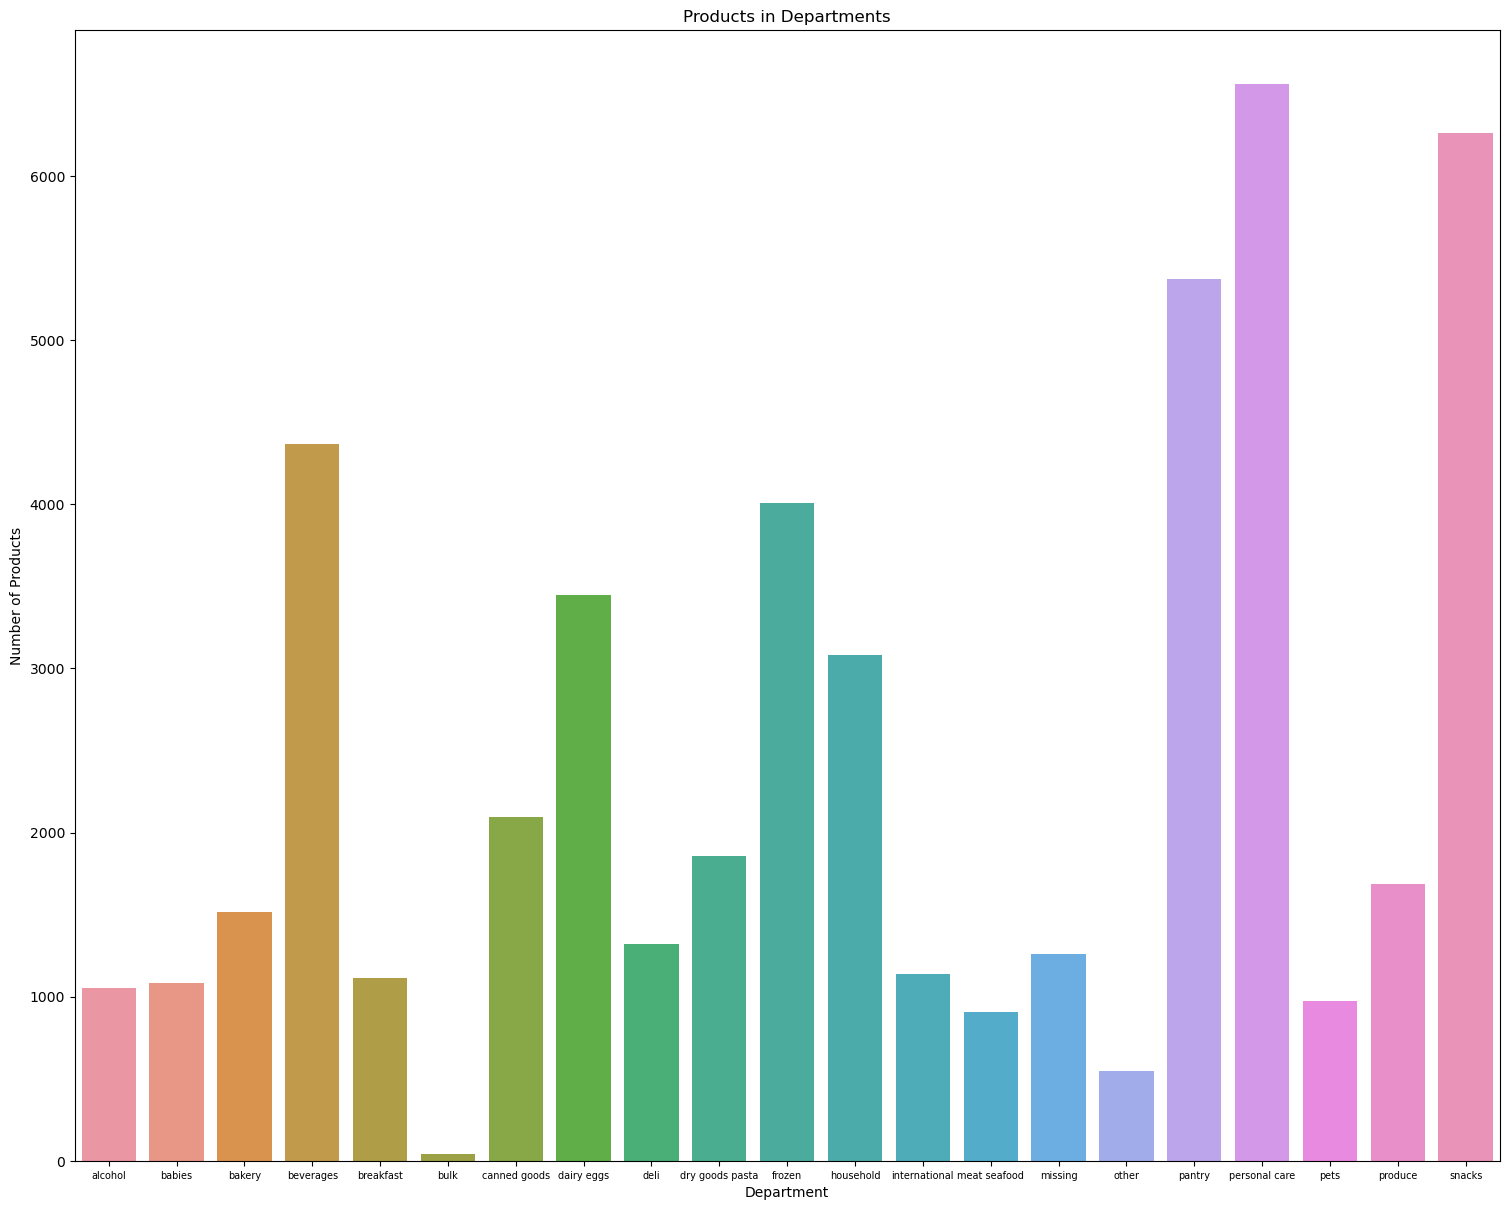

In [42]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.barplot(x=products_in_departmarts.index, y=products_in_departmarts.values)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Department')
ax.set_ylabel('Number of Products')
ax.set_title('Products in Departments')
plt.show()
plt.show()

In [43]:
products_in_aisles = products.groupby('department')['aisle'].nunique()
products_in_aisles

department
alcohol             5
babies              4
bakery              5
beverages           8
breakfast           4
bulk                2
canned goods        5
dairy eggs         10
deli                5
dry goods pasta     5
frozen             11
household          10
international       4
meat seafood        7
missing             1
other               1
pantry             12
personal care      17
pets                2
produce             5
snacks             11
Name: aisle, dtype: int64

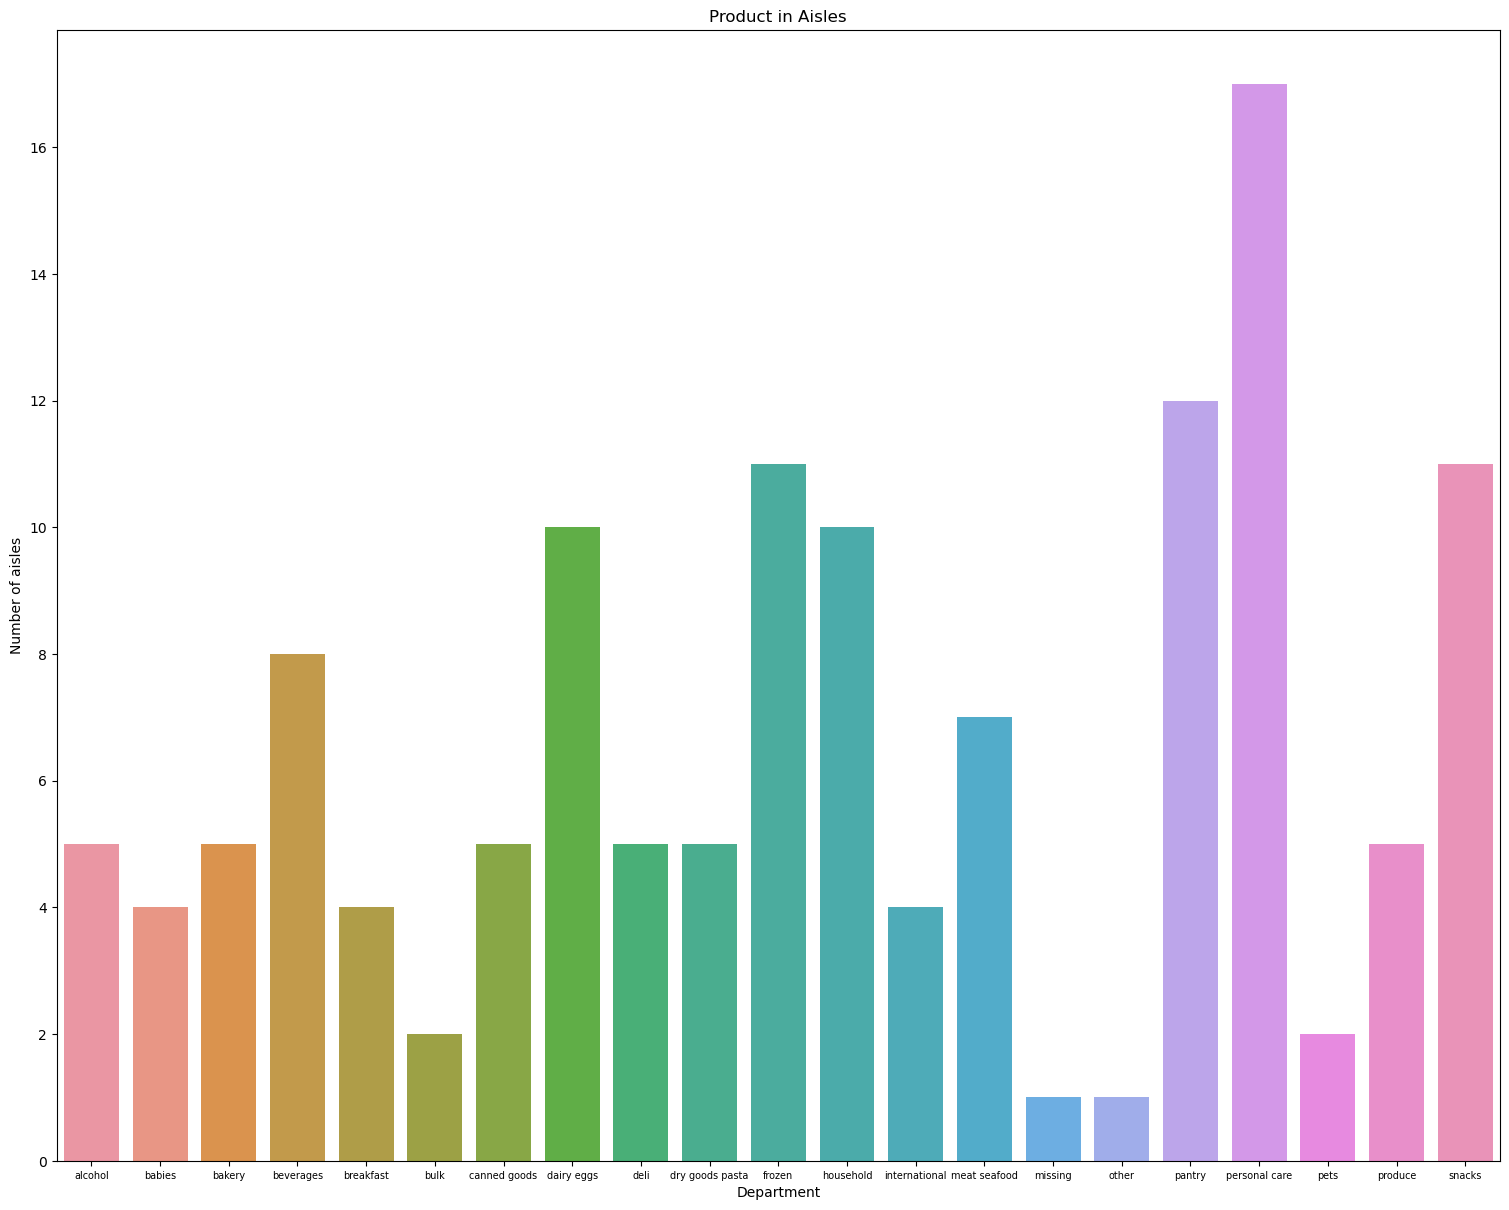

In [44]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.barplot(x=products_in_aisles.index, y=products_in_aisles.values)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Department')
ax.set_ylabel('Number of aisles')
ax.set_title('Product in Aisles')
plt.show()

In [67]:
products_in_aisles = products.groupby('aisle_id')['product_id'].nunique().reset_index()
products_in_aisles

,aisle_id,product_id
0,1,146
1,2,271
2,3,832
3,4,543
4,5,409
...,...,...
129,130,303
130,131,457
131,132,178
132,133,172


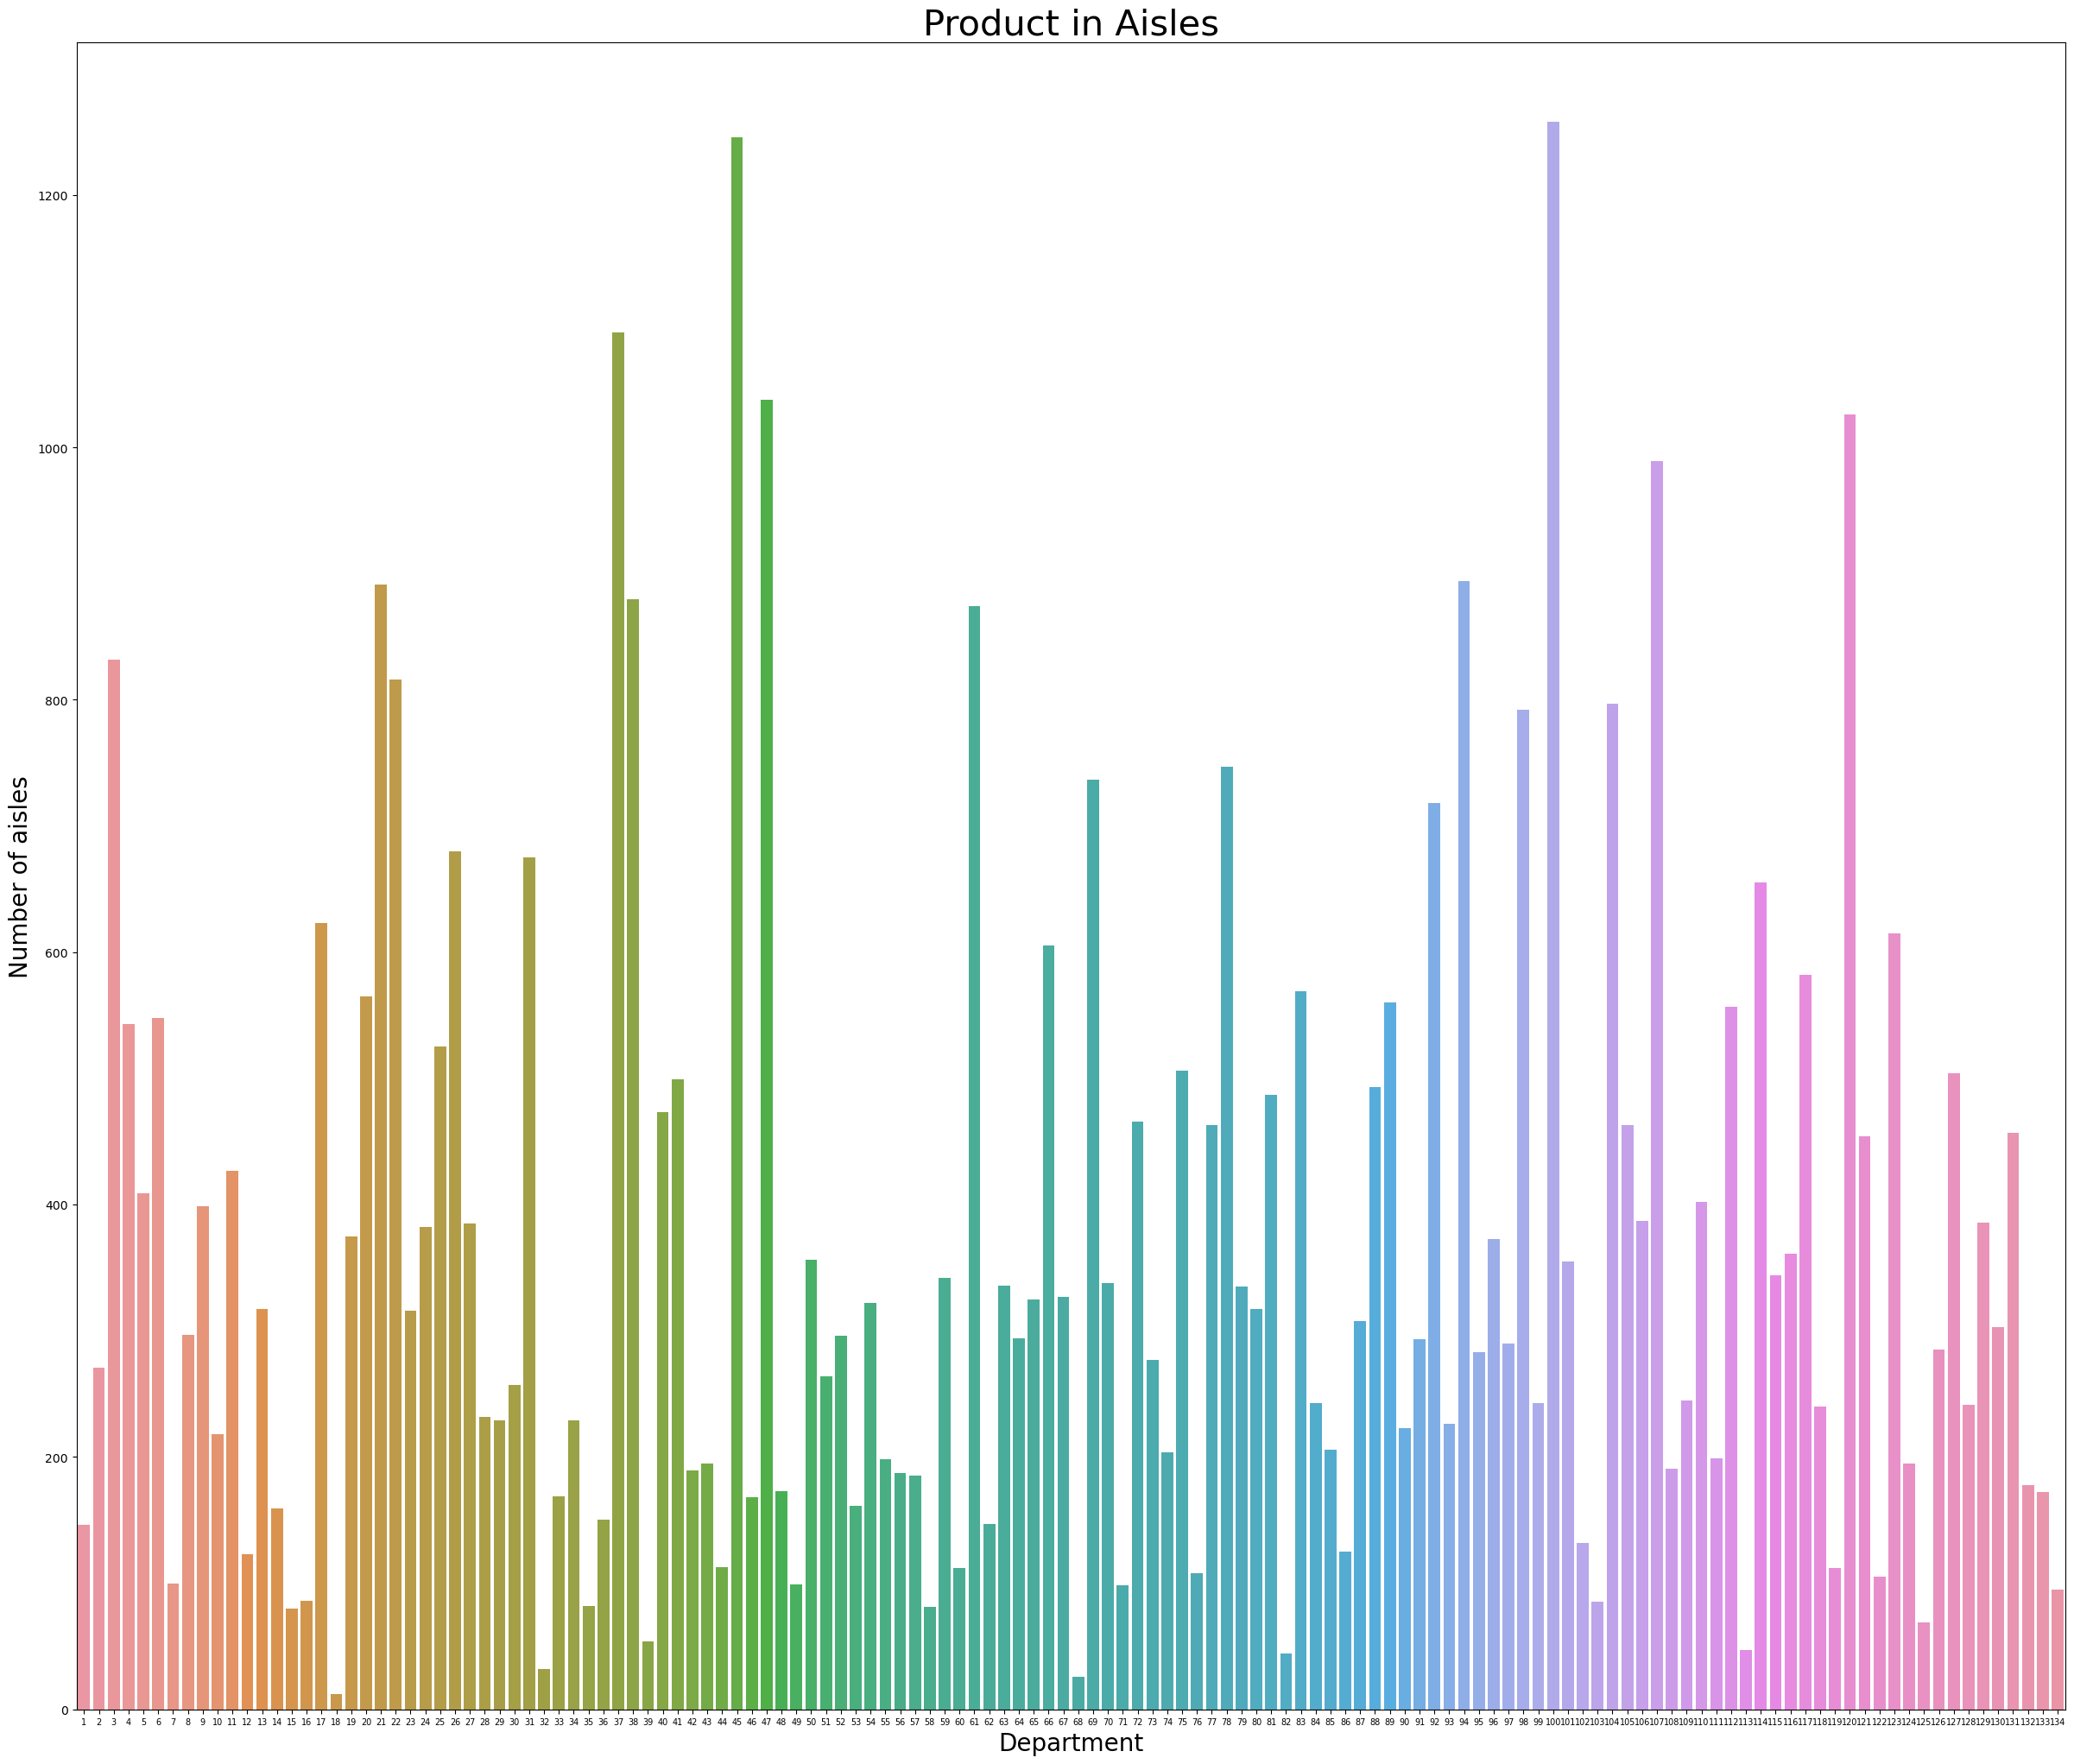

In [68]:
fig, ax = plt.subplots(figsize=(24,20))
ax = sns.barplot(x=products_in_aisles['aisle_id'], y=products_in_aisles['product_id'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Department', size=20)
ax.set_ylabel('Number of aisles', size=20)
ax.set_title('Product in Aisles', size=30)
plt.show()

In [69]:
order_prior_train = pd.concat([order_product_prior,order_product_train],axis=0)

In [70]:
order_prior_train

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [49]:
product_vs_add_to_cart = order_prior_train.groupby('order_id')['add_to_cart_order'].count().sort_values(ascending=False).head(10)
product_vs_add_to_cart

order_id
1564244    145
790903     137
61355      127
2970392    121
2069920    116
3308010    115
2753324    114
2499774    112
2621625    109
77151      109
Name: add_to_cart_order, dtype: int64

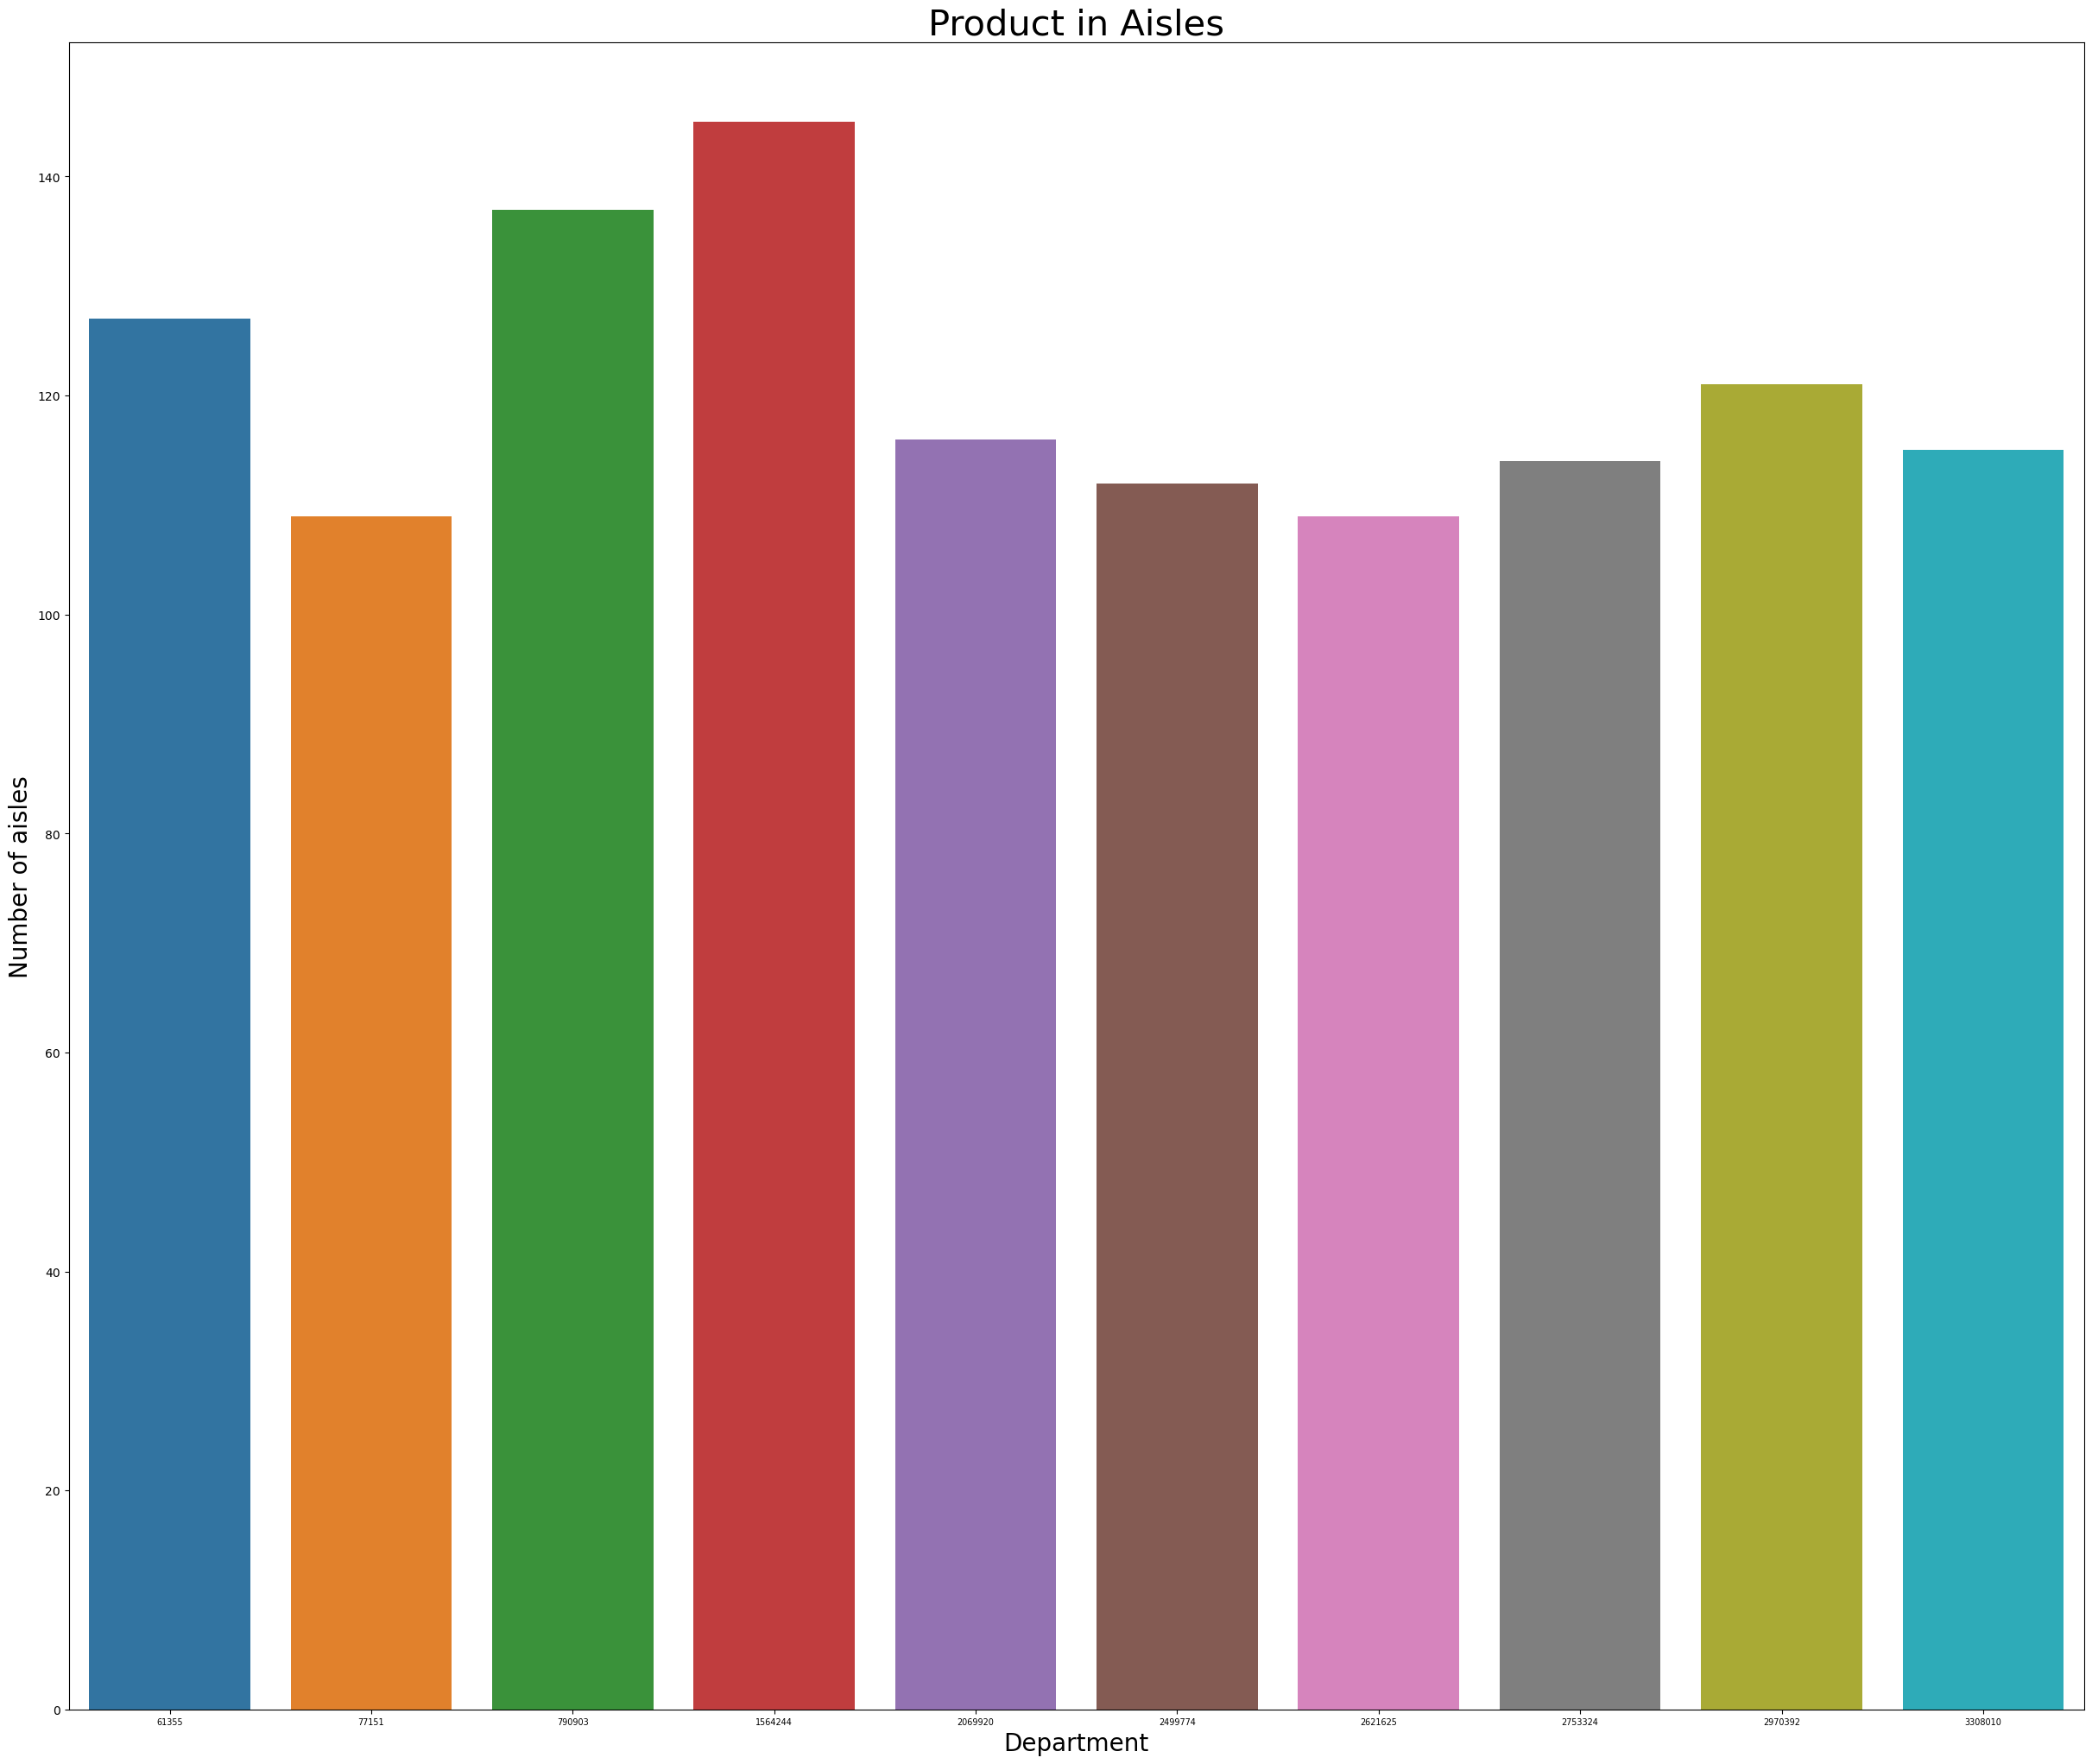

In [50]:
fig, ax = plt.subplots(figsize=(24,20))
ax = sns.barplot(x=product_vs_add_to_cart.index, y=product_vs_add_to_cart.values)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Department', size=20)
ax.set_ylabel('Number of aisles', size=20)
ax.set_title('Product in Aisles', size=30)
plt.show()

In [51]:
product_vs_add_to_cart = order_prior_train.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(10)
product_vs_add_to_cart

product_id
24852    415166
13176    329275
21137    214448
21903    194939
47209    176173
47766    140270
27845    118684
47626    112178
27966    109688
16797    104588
Name: reordered, dtype: int64

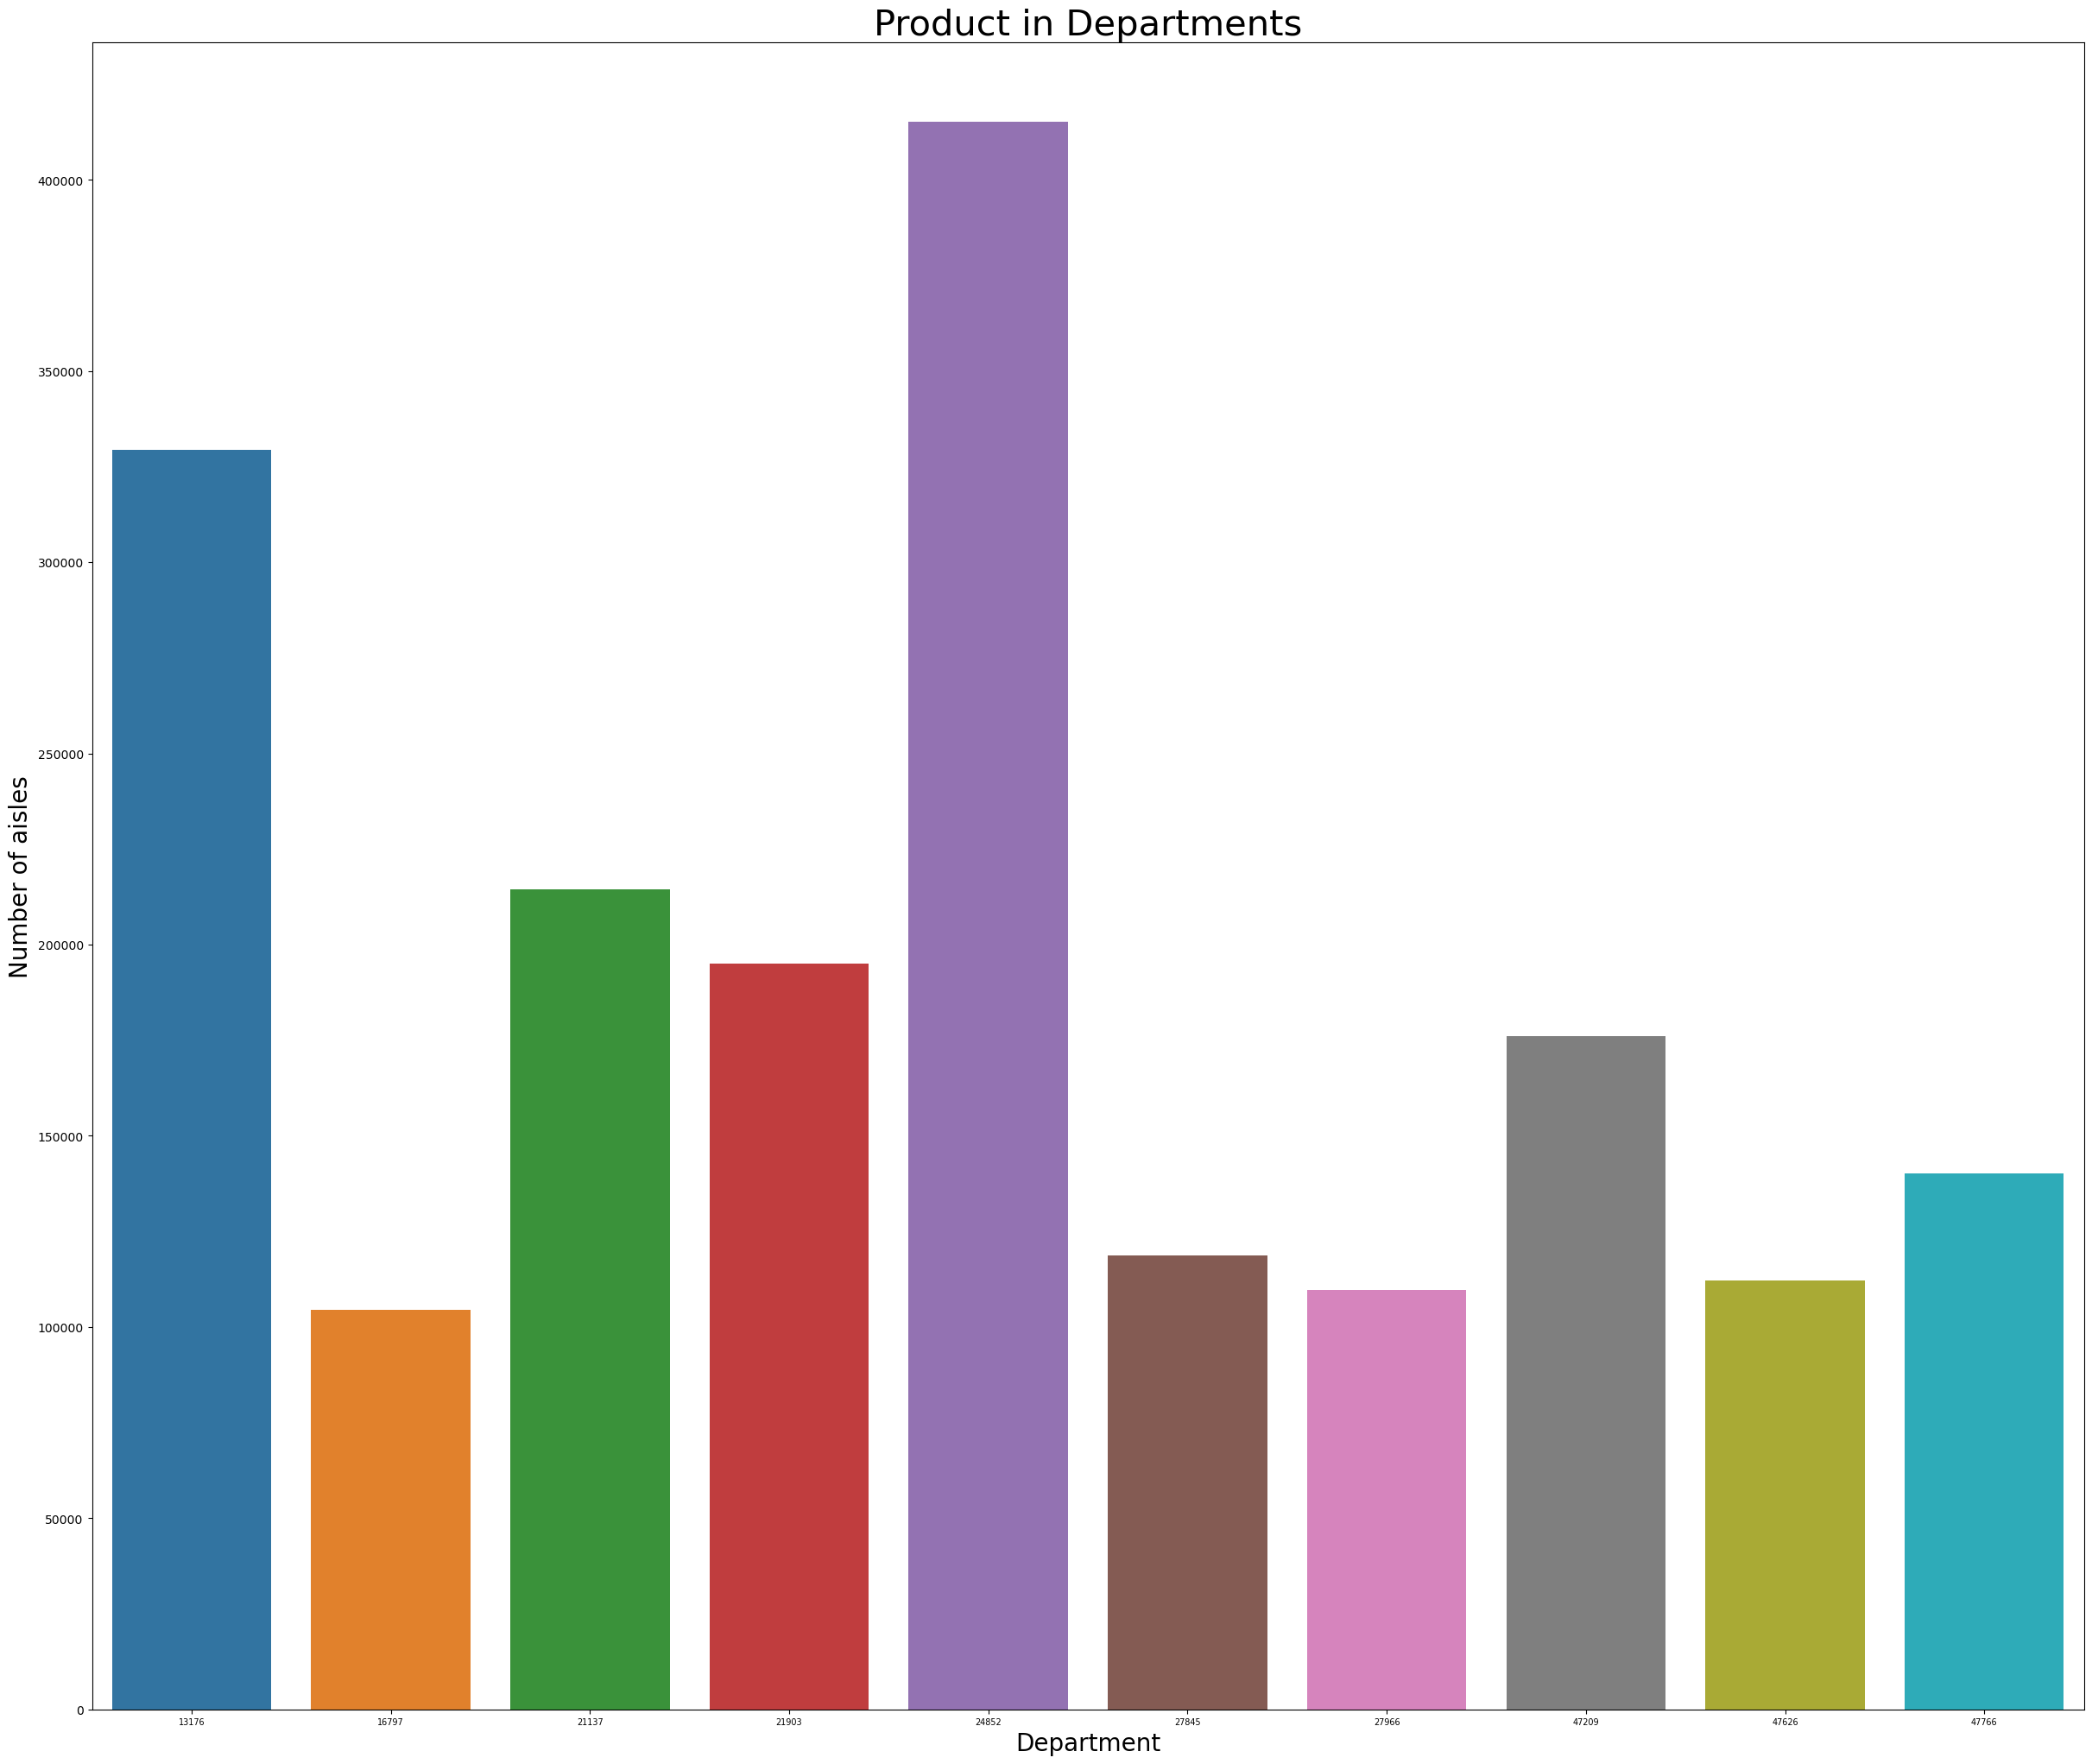

In [57]:
fig, ax = plt.subplots(figsize=(24,20))
ax = sns.barplot(x=product_vs_add_to_cart.index, y=product_vs_add_to_cart.values)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Department', size=20)
ax.set_ylabel('Number of aisles', size=20)
ax.set_title('Product in Departments', size=30)
plt.show()

In [58]:
order_prior_train.groupby('order_id')['reordered'].sum().max()

130

In [59]:
order_prior_train.groupby('order_id')['product_id'].count().max()

145

In [60]:
order_prior_train.groupby('product_id')['order_id'].count().max()

491291

In [62]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


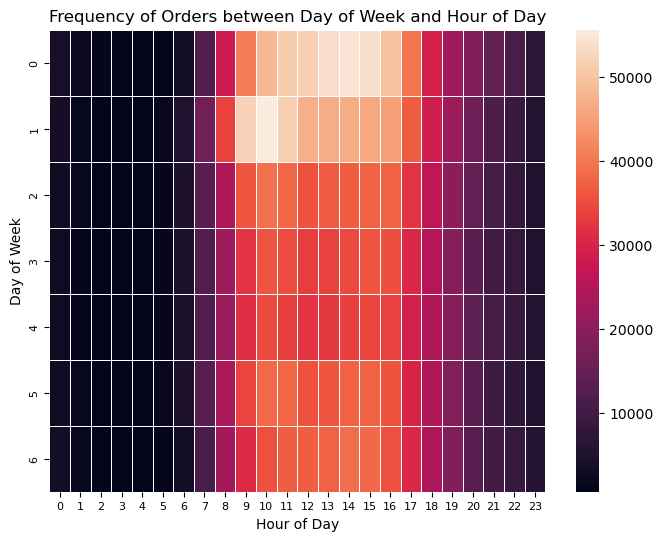

In [63]:
ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(temp_df,linewidths=.5)
ax.set_title("Frequency of Orders between Day of Week and Hour of Day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

In [64]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [65]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [66]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
department          21
aisle              134
dtype: int64